# How to use logging


optimagic can keep a persistent log of the parameter and criterion values tried out by an optimizer in a sqlite database. 


## Turn logging on or off

To enable logging, it suffices to provide a path to an sqlite database when calling ``maximize`` or ``minimize``. The database does not have to exist, optimagic will generate it for you. 

In [1]:
import optimagic as om
import numpy as np

In [2]:
def sphere(params):
    return params @ params

In [3]:
res = om.minimize(
    criterion=sphere,
    params=np.arange(5),
    algorithm="scipy_lbfgsb",
    logging="my_log.db",
)

## Make logging faster

By default, we use a very safe mode of sqlite that makes it almost impossible to corrupt the database. Even if your computer is suddenly shut down or unplugged. 

However, this makes writing logs rather slow, which becomes notable when the criterion function is very fast. 

In that case, you can enable ``"fast_logging"``, which is still quite safe!

In [4]:
res = om.minimize(
    criterion=sphere,
    params=np.arange(5),
    algorithm="scipy_lbfgsb",
    logging="my_log.db",
    log_options={"fast_logging": True},
)

## Handling existing tables

By default, we only append to databases and do not overwrite data in them. You have a few options to change this:

In [5]:
res = om.minimize(
    criterion=sphere,
    params=np.arange(5),
    algorithm="scipy_lbfgsb",
    logging="my_log.db",
    log_options={
        "if_database_exists": "replace",  # one of "raise", "replace", "extend",
        "if_table_exists": "replace",  # one of "raise", "replace", "extend"
    },
)

## Reading the log

In [6]:
reader = om.OptimizeLogReader("my_log.db")

Read the start params

In [7]:
reader.read_start_params()

array([0, 1, 2, 3, 4])

Read a specific iteration (use -1 for the last)

In [8]:
reader.read_iteration(-1)

{'rowid': 3,
 'params': array([ 0.00000000e+00, -2.19792136e-07, -4.01986531e-08, -1.26862247e-07,
        -2.06263029e-07]),
 'internal_derivative': array([ 1.49011612e-09, -4.38094157e-07, -7.89071900e-08, -2.52234379e-07,
        -4.11035942e-07]),
 'timestamp': 1409115.084173416,
 'exceptions': None,
 'valid': True,
 'hash': None,
 'value': 1.0856298186326115e-13,
 'step': 1,
 'criterion_eval': 1.0856298186326115e-13}

Read the full history

In [9]:
reader.read_history().keys()

dict_keys(['params', 'criterion', 'runtime'])

## Plot the history from a log

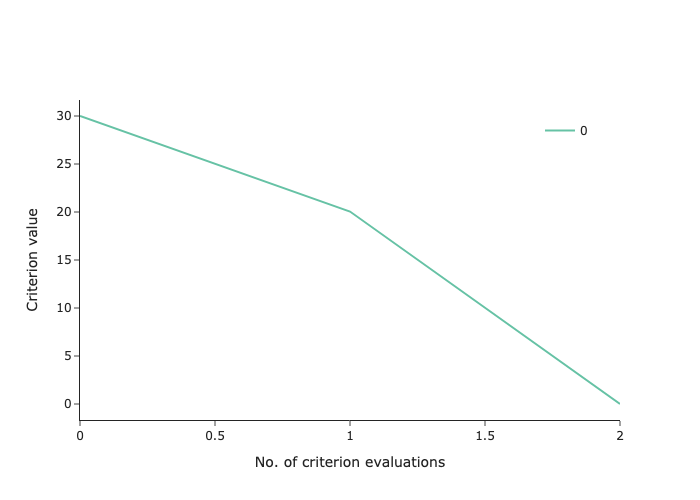

In [10]:
fig = om.criterion_plot("my_log.db")
fig.show(renderer="png")

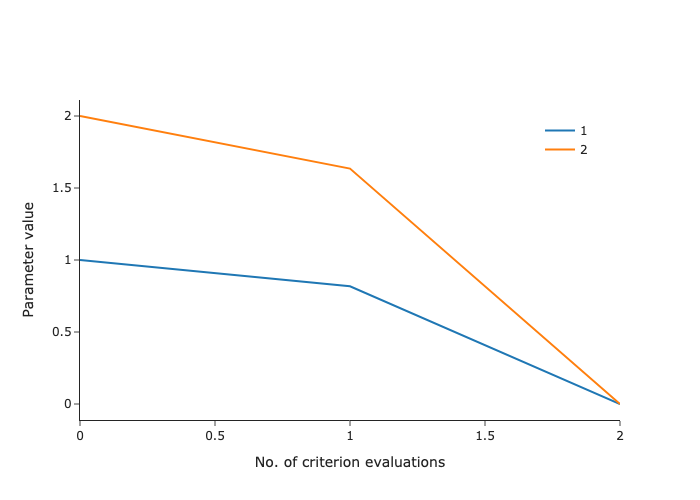

In [11]:
fig = om.params_plot("my_log.db", selector=lambda x: x[1:3])
fig.show(renderer="png")